#### **Import libraries**

In [1]:
import pandas as pd
import numpy as np
from google.colab import files
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import seaborn as sns # for plot visualization
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### **Upload files**

In [2]:
uploaded = files.upload()

Saving pr_1991_2020_VNM.csv to pr_1991_2020_VNM.csv
Saving tas_1991_2020_VNM.csv to tas_1991_2020_VNM.csv


In [3]:
df_tAvg = pd.read_csv('tas_1991_2020_VNM.csv')
df_rainFall = pd.read_csv('pr_1991_2020_VNM.csv')

#### **Rainfall prediction**

##### *Data processing*

In [4]:
df_rainFall[' Statistics'] = df_rainFall[' Statistics'].apply(lambda x: x[0:-8])

In [5]:
df_rainFall

,Rainfall - (MM),Year,Statistics,Country,ISO3
0,28.1,1991,Jan,Vietnam,VNM
1,17.1,1991,Feb,Vietnam,VNM
2,41.6,1991,Mar,Vietnam,VNM
3,50.8,1991,Apr,Vietnam,VNM
4,134.1,1991,May,Vietnam,VNM
...,...,...,...,...,...
355,253.4,2020,Aug,Vietnam,VNM
356,267.0,2020,Sep,Vietnam,VNM
357,294.8,2020,Oct,Vietnam,VNM
358,150.3,2020,Nov,Vietnam,VNM


In [6]:
df_rainFall[' Statistics'] = df_rainFall[' Statistics'].replace([' Jan', ' Feb', ' Mar', ' Apr', ' May', ' Jun', ' Jul', ' Aug', ' Sep', ' Oct', ' Nov', ' Dec'], ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'])

In [7]:
df_rainFall

,Rainfall - (MM),Year,Statistics,Country,ISO3
0,28.1,1991,01,Vietnam,VNM
1,17.1,1991,02,Vietnam,VNM
2,41.6,1991,03,Vietnam,VNM
3,50.8,1991,04,Vietnam,VNM
4,134.1,1991,05,Vietnam,VNM
...,...,...,...,...,...
355,253.4,2020,08,Vietnam,VNM
356,267.0,2020,09,Vietnam,VNM
357,294.8,2020,10,Vietnam,VNM
358,150.3,2020,11,Vietnam,VNM


In [8]:
df_rainFall['date'] = df_rainFall[' Year'].astype('str') + '-' + df_rainFall[' Statistics'].astype('str')

In [9]:
df_rainFall

,Rainfall - (MM),Year,Statistics,Country,ISO3,date
0,28.1,1991,01,Vietnam,VNM,1991-01
1,17.1,1991,02,Vietnam,VNM,1991-02
2,41.6,1991,03,Vietnam,VNM,1991-03
3,50.8,1991,04,Vietnam,VNM,1991-04
4,134.1,1991,05,Vietnam,VNM,1991-05
...,...,...,...,...,...,...
355,253.4,2020,08,Vietnam,VNM,2020-08
356,267.0,2020,09,Vietnam,VNM,2020-09
357,294.8,2020,10,Vietnam,VNM,2020-10
358,150.3,2020,11,Vietnam,VNM,2020-11


In [10]:
df_rainFall.drop([' Year', ' Statistics', ' Country', ' ISO3'], axis=1, inplace=True)

In [11]:
df_rainFall.rename(columns={"Rainfall - (MM)": "rainfall"}, inplace=True)

In [12]:
dataset = df_rainFall
dataset

,rainfall,date
0,28.1,1991-01
1,17.1,1991-02
2,41.6,1991-03
3,50.8,1991-04
4,134.1,1991-05
...,...,...
355,253.4,2020-08
356,267.0,2020-09
357,294.8,2020-10
358,150.3,2020-11


In [13]:
dataset.index = pd.to_datetime(dataset.date)
dataset.index

DatetimeIndex(['1991-01-01', '1991-02-01', '1991-03-01', '1991-04-01',
               '1991-05-01', '1991-06-01', '1991-07-01', '1991-08-01',
               '1991-09-01', '1991-10-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', name='date', length=360, freq=None)

In [14]:
dataset

,rainfall,date
date,,
1991-01-01,28.1,1991-01
1991-02-01,17.1,1991-02
1991-03-01,41.6,1991-03
1991-04-01,50.8,1991-04
1991-05-01,134.1,1991-05
...,...,...
2020-08-01,253.4,2020-08
2020-09-01,267.0,2020-09
2020-10-01,294.8,2020-10


In [15]:
dataset.drop(['date'], axis=1, inplace=True)

In [16]:
dataset

,rainfall
date,
1991-01-01,28.1
1991-02-01,17.1
1991-03-01,41.6
1991-04-01,50.8
1991-05-01,134.1
...,...
2020-08-01,253.4
2020-09-01,267.0
2020-10-01,294.8


##### *Visualization*

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7512845f90>],
      dtype=object)

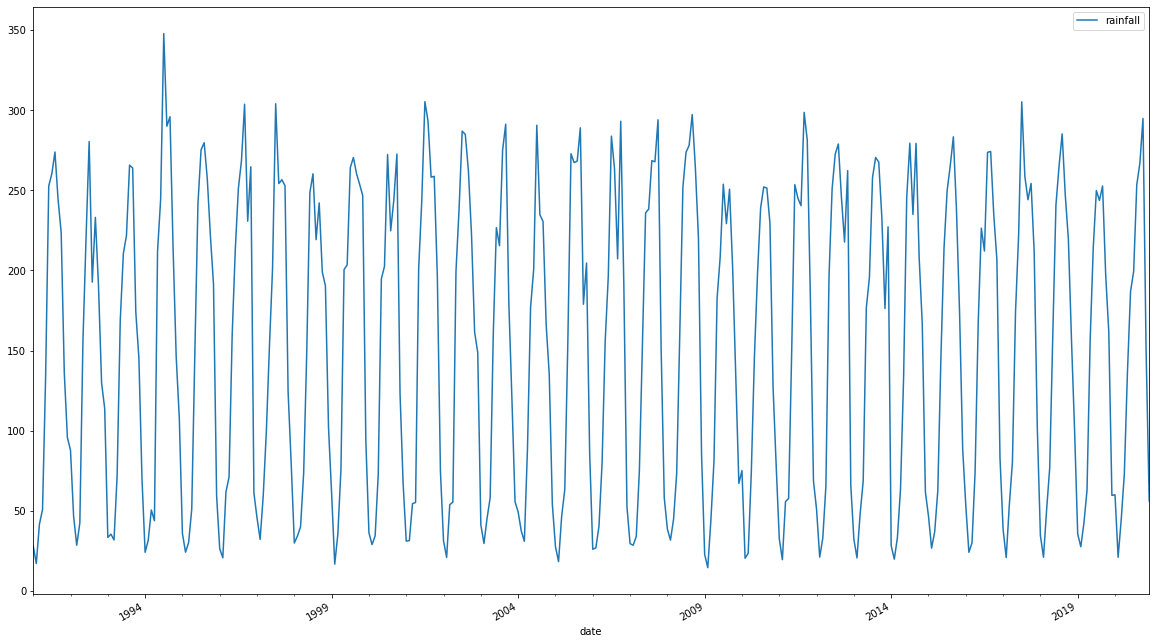

In [17]:
dataset.plot(subplots=True, figsize=(20,12))

In [18]:
train_df = dataset['1991':'2018'].resample('M').mean().fillna(method='pad')
test_df = dataset['2019':'2020'].resample('M').mean().fillna(method='pad')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


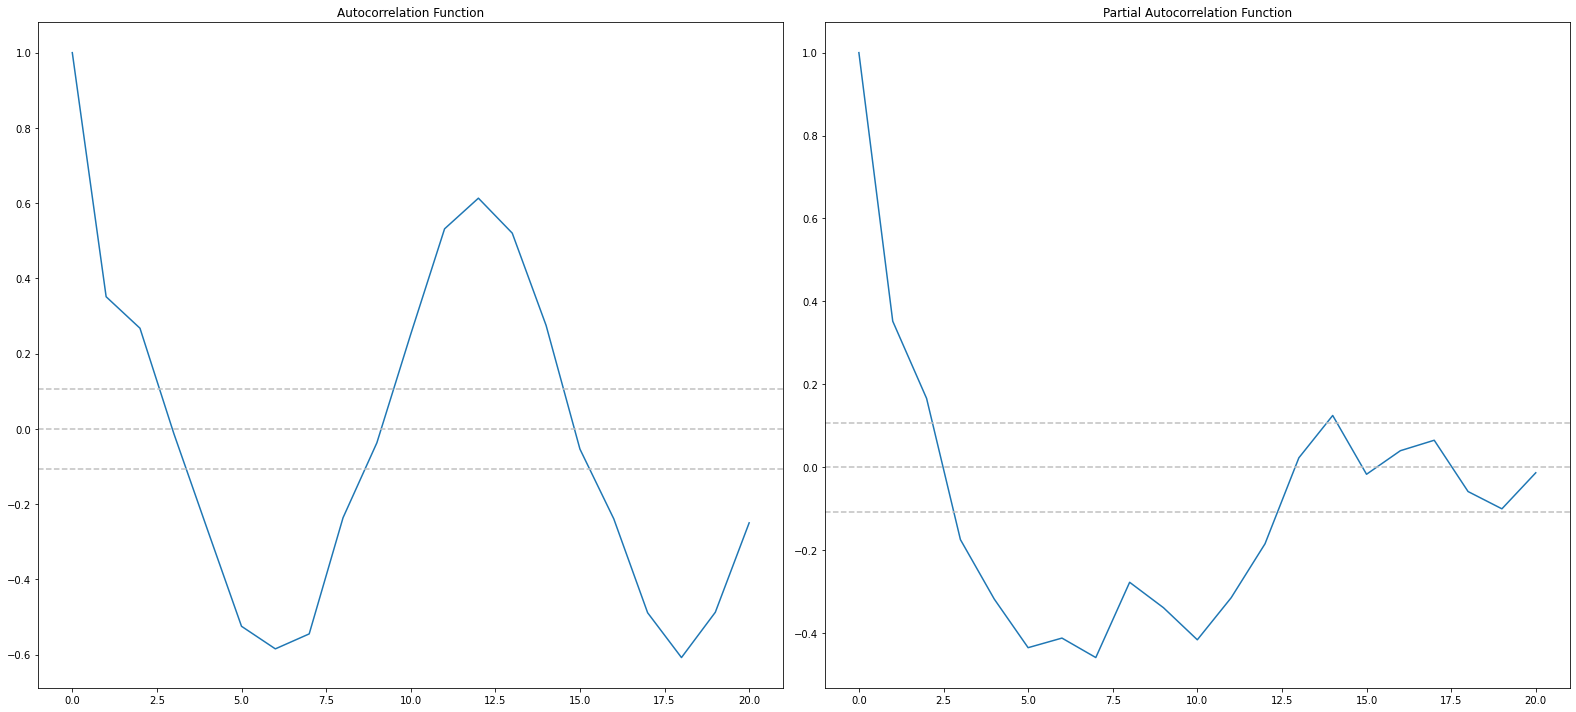

In [19]:
acf_lag = acf(train_df.diff().dropna().values, nlags=20)
pacf_lag = pacf(train_df.diff().dropna().values, nlags=20, method='ols')

plt.figure(figsize=(22,10))

plt.subplot(121)
plt.plot(acf_lag)
plt.axhline(y=0,linestyle='--',color='silver')
plt.axhline(y=-1.96/np.sqrt(len(train_df.diff().values)),linestyle='--',color='silver')
plt.axhline(y=1.96/np.sqrt(len(train_df.diff().values)),linestyle='--',color='silver')
plt.title("Autocorrelation Function")

plt.subplot(122)
plt.plot(pacf_lag)
plt.axhline(y=0,linestyle='--',color='silver')
plt.axhline(y=-1.96/np.sqrt(len(train_df.diff().values)),linestyle='--',color='silver')
plt.axhline(y=1.96/np.sqrt(len(train_df.diff().values)),linestyle='--',color='silver')
plt.title("Partial Autocorrelation Function")
plt.tight_layout()

##### *Train model and predict*

In [20]:
model = ARIMA(train_df.values, order=(2,0,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  336
Model:                     ARMA(2, 2)   Log Likelihood               -1598.970
Method:                       css-mle   S.D. of innovations             27.726
Date:                Wed, 04 Aug 2021   AIC                           3209.940
Time:                        06:01:50   BIC                           3232.843
Sample:                             0   HQIC                          3219.070
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        153.3814      1.556     98.556      0.000     150.331     156.432
ar.L1.y        1.7323      0.000   3566.583      0.000       1.731       1.733
ar.L2.y       -1.0000      0.000  -2795.821      0.0

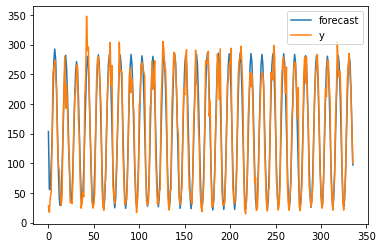

In [21]:
model_fit.plot_predict(dynamic=False)
plt.show()

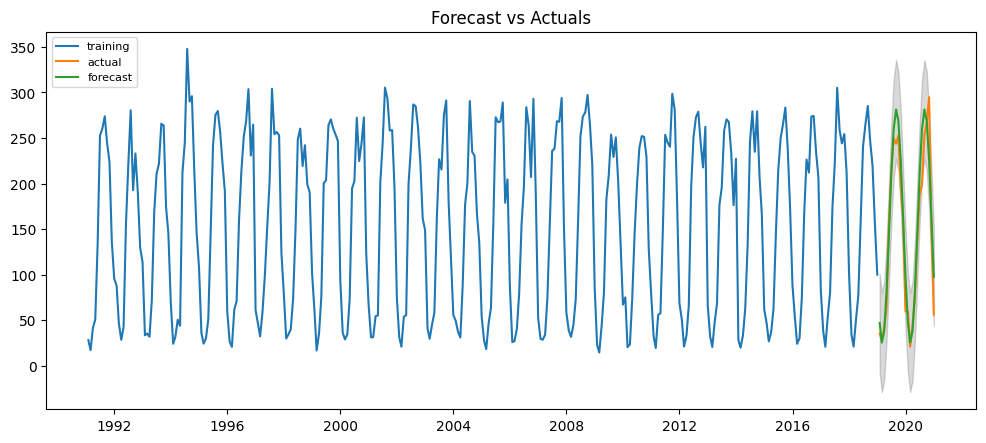

In [22]:
# # Forecast
fc, se, conf = model_fit.forecast(24, alpha=0.05)  # 95% conf

#print(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_df.index)
lower_series = pd.Series(conf[:, 0], index=test_df.index)
upper_series = pd.Series(conf[:, 1], index=test_df.index)

# # Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_df, label='training')
plt.plot(test_df, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [23]:
print(fc)

[ 46.96165788  25.40234619  38.10562328  81.66979657 144.43128897
 209.58736616 259.69462551 281.33889502 268.72632992 225.2343376
 162.50717155  97.33837728  47.17476312  25.4455892   37.96743128
  81.38717013 144.07989526 209.26128065 259.48114601 281.29517078
 268.86406259 225.51664956 162.85847984  97.66462928]


##### *Save model*

In [24]:
from pickle import dump
dump(model_fit, open('ARIMA_rainfall.pkl', 'wb'))

##### *Load model and test*

In [25]:
from pickle import load
model = load(open('ARIMA_rainfall.pkl', 'rb'))

In [26]:
fc, se, conf = model_fit.forecast(24, alpha=0.05)  # 95% conf

In [27]:
fc

array([ 46.96165788,  25.40234619,  38.10562328,  81.66979657,
       144.43128897, 209.58736616, 259.69462551, 281.33889502,
       268.72632992, 225.2343376 , 162.50717155,  97.33837728,
        47.17476312,  25.4455892 ,  37.96743128,  81.38717013,
       144.07989526, 209.26128065, 259.48114601, 281.29517078,
       268.86406259, 225.51664956, 162.85847984,  97.66462928])

#### **Average temperature prediction**

##### *Data processing*

In [28]:
df_tAvg[' Statistics'] = df_tAvg[' Statistics'].apply(lambda x: x[0:-8])

In [29]:
df_tAvg

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,21.0,1991,Jan,Vietnam,VNM
1,21.6,1991,Feb,Vietnam,VNM
2,23.6,1991,Mar,Vietnam,VNM
3,26.1,1991,Apr,Vietnam,VNM
4,27.4,1991,May,Vietnam,VNM
...,...,...,...,...,...
355,27.5,2020,Aug,Vietnam,VNM
356,27.0,2020,Sep,Vietnam,VNM
357,24.3,2020,Oct,Vietnam,VNM
358,23.7,2020,Nov,Vietnam,VNM


In [30]:
df_tAvg[' Statistics'] = df_tAvg[' Statistics'].replace([' Jan', ' Feb', ' Mar', ' Apr', ' May', ' Jun', ' Jul', ' Aug', ' Sep', ' Oct', ' Nov', ' Dec'], ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'])

In [31]:
df_tAvg

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,21.0,1991,01,Vietnam,VNM
1,21.6,1991,02,Vietnam,VNM
2,23.6,1991,03,Vietnam,VNM
3,26.1,1991,04,Vietnam,VNM
4,27.4,1991,05,Vietnam,VNM
...,...,...,...,...,...
355,27.5,2020,08,Vietnam,VNM
356,27.0,2020,09,Vietnam,VNM
357,24.3,2020,10,Vietnam,VNM
358,23.7,2020,11,Vietnam,VNM


In [32]:
df_tAvg['date'] = df_tAvg[' Year'].astype('str') + '-' + df_tAvg[' Statistics'].astype('str')

In [33]:
df_tAvg

,Temperature - (Celsius),Year,Statistics,Country,ISO3,date
0,21.0,1991,01,Vietnam,VNM,1991-01
1,21.6,1991,02,Vietnam,VNM,1991-02
2,23.6,1991,03,Vietnam,VNM,1991-03
3,26.1,1991,04,Vietnam,VNM,1991-04
4,27.4,1991,05,Vietnam,VNM,1991-05
...,...,...,...,...,...,...
355,27.5,2020,08,Vietnam,VNM,2020-08
356,27.0,2020,09,Vietnam,VNM,2020-09
357,24.3,2020,10,Vietnam,VNM,2020-10
358,23.7,2020,11,Vietnam,VNM,2020-11


In [34]:
df_tAvg.drop([' Year', ' Statistics', ' Country', ' ISO3'], axis=1, inplace=True)

In [35]:
df_tAvg.rename(columns={"Temperature - (Celsius)": "rainfall"}, inplace=True)

In [36]:
dataset = df_tAvg
dataset

,rainfall,date
0,21.0,1991-01
1,21.6,1991-02
2,23.6,1991-03
3,26.1,1991-04
4,27.4,1991-05
...,...,...
355,27.5,2020-08
356,27.0,2020-09
357,24.3,2020-10
358,23.7,2020-11


In [37]:
dataset.index = pd.to_datetime(dataset.date)
dataset.index

DatetimeIndex(['1991-01-01', '1991-02-01', '1991-03-01', '1991-04-01',
               '1991-05-01', '1991-06-01', '1991-07-01', '1991-08-01',
               '1991-09-01', '1991-10-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', name='date', length=360, freq=None)

In [38]:
dataset

,rainfall,date
date,,
1991-01-01,21.0,1991-01
1991-02-01,21.6,1991-02
1991-03-01,23.6,1991-03
1991-04-01,26.1,1991-04
1991-05-01,27.4,1991-05
...,...,...
2020-08-01,27.5,2020-08
2020-09-01,27.0,2020-09
2020-10-01,24.3,2020-10


In [39]:
dataset.drop(['date'], axis=1, inplace=True)

In [40]:
dataset

,rainfall
date,
1991-01-01,21.0
1991-02-01,21.6
1991-03-01,23.6
1991-04-01,26.1
1991-05-01,27.4
...,...
2020-08-01,27.5
2020-09-01,27.0
2020-10-01,24.3


##### *Visualization*

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7505fb8550>],
      dtype=object)

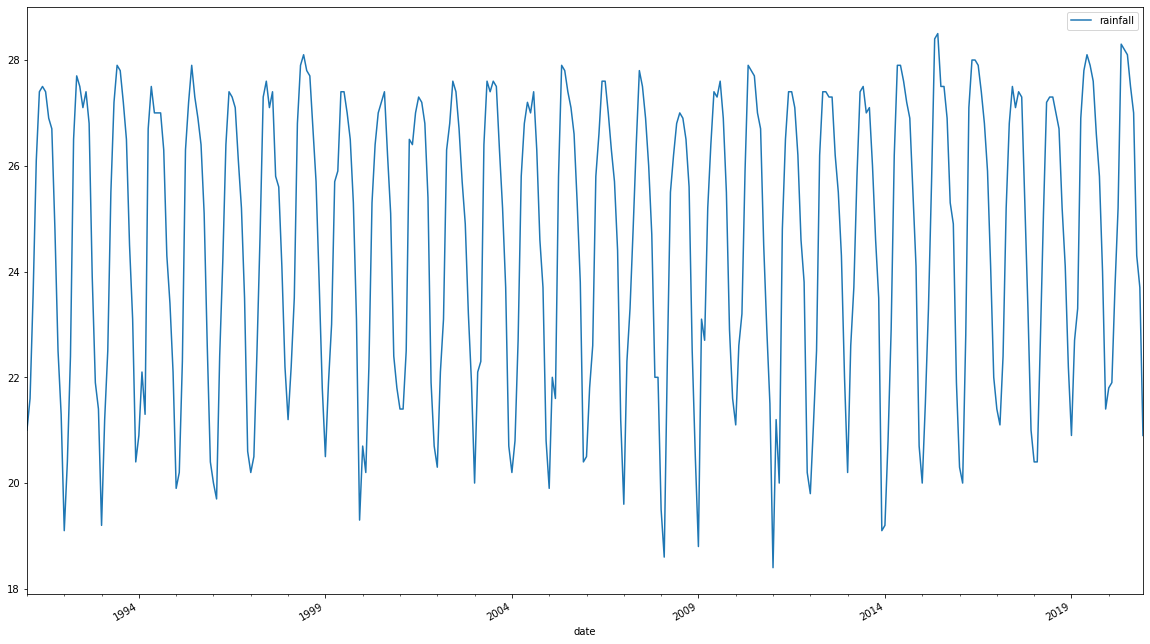

In [41]:
dataset.plot(subplots=True, figsize=(20,12))

In [42]:
train_df = dataset['1991':'2018'].resample('M').mean().fillna(method='pad')
test_df = dataset['2019':'2020'].resample('M').mean().fillna(method='pad')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


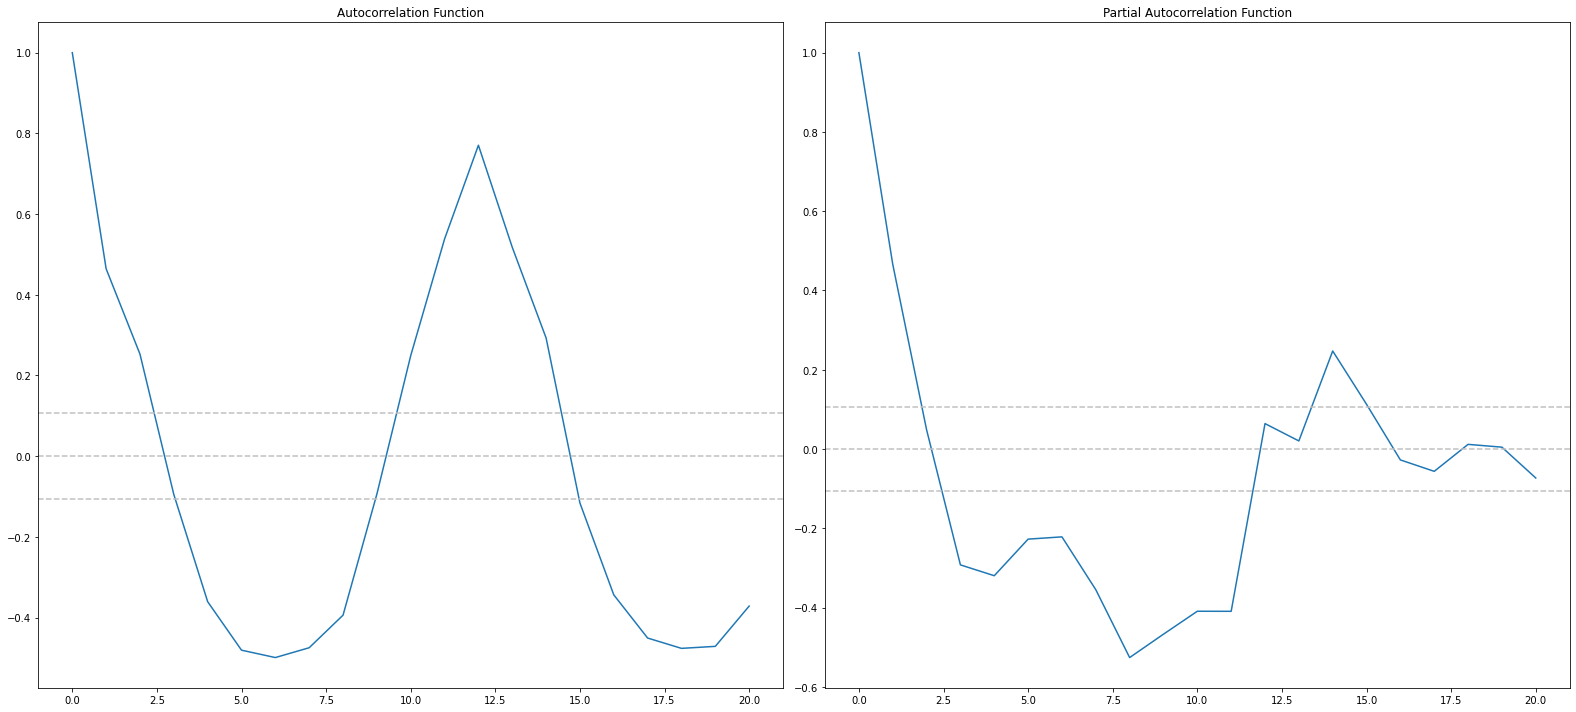

In [43]:
acf_lag = acf(train_df.diff().dropna().values, nlags=20)
pacf_lag = pacf(train_df.diff().dropna().values, nlags=20, method='ols')

plt.figure(figsize=(22,10))

plt.subplot(121)
plt.plot(acf_lag)
plt.axhline(y=0,linestyle='--',color='silver')
plt.axhline(y=-1.96/np.sqrt(len(train_df.diff().values)),linestyle='--',color='silver')
plt.axhline(y=1.96/np.sqrt(len(train_df.diff().values)),linestyle='--',color='silver')
plt.title("Autocorrelation Function")

plt.subplot(122)
plt.plot(pacf_lag)
plt.axhline(y=0,linestyle='--',color='silver')
plt.axhline(y=-1.96/np.sqrt(len(train_df.diff().values)),linestyle='--',color='silver')
plt.axhline(y=1.96/np.sqrt(len(train_df.diff().values)),linestyle='--',color='silver')
plt.title("Partial Autocorrelation Function")
plt.tight_layout()

##### *Train model and predict*

In [44]:
model = ARIMA(train_df.values, order=(3,0,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  336
Model:                     ARMA(3, 2)   Log Likelihood                -424.004
Method:                       css-mle   S.D. of innovations              0.842
Date:                Wed, 04 Aug 2021   AIC                            862.009
Time:                        06:01:53   BIC                            888.729
Sample:                             0   HQIC                           872.660
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.5885      0.066    374.245      0.000      24.460      24.717
ar.L1.y        2.0575        nan        nan        nan         nan         nan
ar.L2.y       -1.5634        nan        nan        n

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


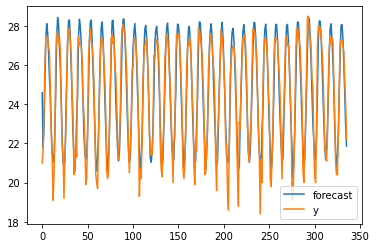

In [45]:
model_fit.plot_predict(dynamic=False)
plt.show()

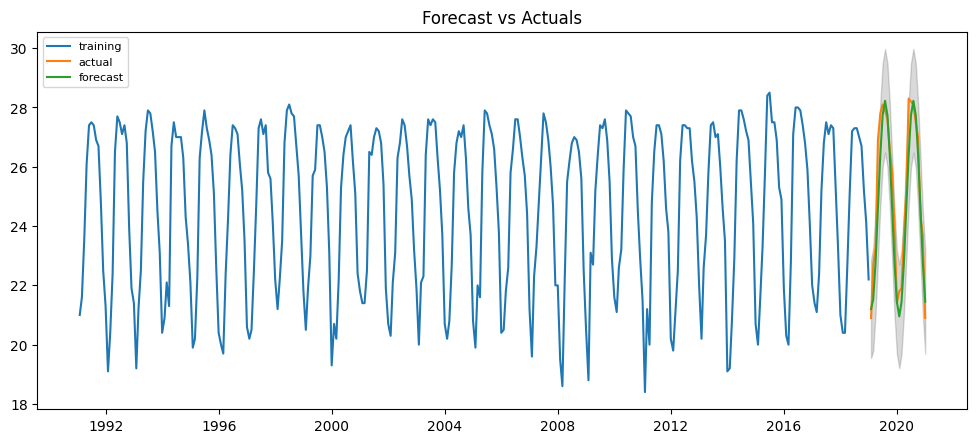

In [46]:
# # Forecast
fc, se, conf = model_fit.forecast(24, alpha=0.05)  # 95% conf

#print(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_df.index)
lower_series = pd.Series(conf[:, 0], index=test_df.index)
upper_series = pd.Series(conf[:, 1], index=test_df.index)

# # Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_df, label='training')
plt.plot(test_df, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [47]:
print(fc)

[21.20074486 21.52297231 22.80072231 24.60088907 26.41189076 27.73923562
 28.22444435 27.73663853 26.4061433  24.58911685 22.77203126 21.44137104
 20.95336861 21.43863082 22.76718184 24.58327611 26.40065599 27.73274668
 28.222929   27.74001123 26.41334111 24.59816049 22.78048245 21.44696163]


##### *Save model*

In [48]:
from pickle import dump
dump(model_fit, open('ARIMA_avgtemp.pkl', 'wb'))

##### *Load model and test*

In [49]:
from pickle import load
model = load(open('ARIMA_avgtemp.pkl', 'rb'))

In [50]:
fc, se, conf = model_fit.forecast(24, alpha=0.05)  # 95% conf

In [51]:
fc

array([21.20074486, 21.52297231, 22.80072231, 24.60088907, 26.41189076,
       27.73923562, 28.22444435, 27.73663853, 26.4061433 , 24.58911685,
       22.77203126, 21.44137104, 20.95336861, 21.43863082, 22.76718184,
       24.58327611, 26.40065599, 27.73274668, 28.222929  , 27.74001123,
       26.41334111, 24.59816049, 22.78048245, 21.44696163])